# Autoregressive AR(p) model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from pandas_datareader import data as wb
import pandas as pd

In [2]:
def autocorr(x,lags):
    corr=[1.0 if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

## AR(1) model:
This is similar to a random walk, except that $\alpha_1$ does not have to equal unity. Our model is going to have $\alpha_1 = 0.6$. We will first plot a realization of the process and the associated correllogram

In [3]:
t_end = 1000

x = np.zeros(t_end)

increment_array = np.random.normal(0.0,1.0,t_end)

x[0] = np.random.normal(0.0,1.0)

for t in range(1,t_end):
    x[t] = 0.6*x[t-1] + increment_array[t]
    
lag_list = list(range(1,31))
corr_func = autocorr(x, lag_list) 

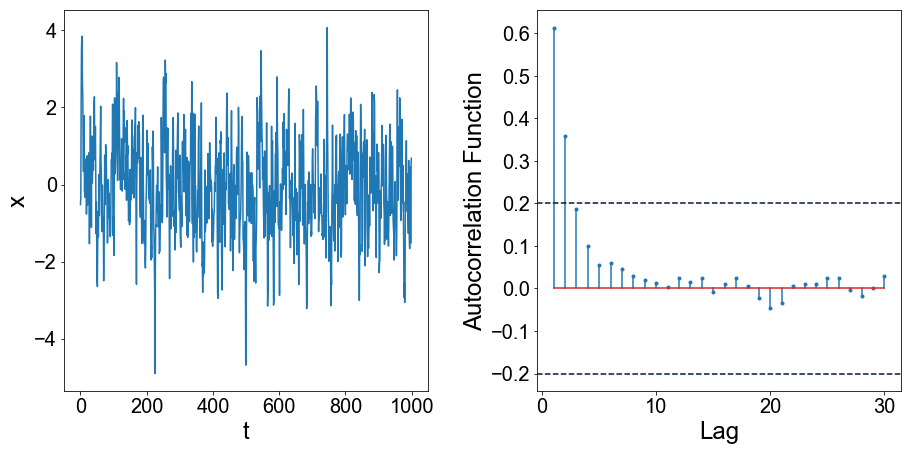

In [5]:
params = {'legend.fontsize': 'x-large',
              'figure.figsize': (15,7),
              'font.family': 'Arial',
              'font.size': 20,
              'axes.labelsize': 24,
              'axes.titlesize': 24,
              'xtick.labelsize': 20,
              'ytick.labelsize': 20,
              'legend.fontsize': 14,
              'legend.loc': 'upper left'}

plt.rcParams.update(params)

plt.subplot(1,2,1)
plt.plot(list(range(0,t_end)), x)
plt.ylabel('x')
plt.xlabel('t')

plt.subplot(1,2,2)
plt.stem(lag_list, corr_func, markerfmt='.')
plt.axhline(y=0.2, color='xkcd:navy', linestyle='--')
plt.axhline(y=-0.2, color='xkcd:navy', linestyle='--')
plt.ylabel('Autocorrelation Function')
plt.xlabel('Lag')

plt.subplots_adjust(wspace = 0.3)

Let's now try fitting an AR(p) process to the simulated data we've just generated, to see if we can recover the underlying parameters. We will use the statsmodels library which provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. It is provided in the AR class.We can use this method to firstly tell us the best order p of the model (as determined by the Akaike Information Criterion) and provide us with parameter estimates for the $\alpha_i$.

In [6]:
model = AR(x)
model_fit = model.fit(method='mle', ic='aic', trend='nc')
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 1
Coefficients: [0.61438526]


In [7]:
print(model_fit.conf_int(0.05))

[[0.56554766 0.66322285]]


Therefore, we see that the fitted model has correctly calculated the autoregression order to be 1 and has calculated a coefficient of 0.6143. The 95 % confidence intervals [0.5655, 0.6632] contain the true model parameter: 0.6

# AR(2) process

Now, we will add some complexity to the our autoregressive model and try fitting a AR(2) process. The simulated process that we would fit is given by:
$x_t = 0.666x_{t-1} - 0.333x_{t-2} + w_t$

We will proceed in a similar manner and first plot a realization of the process and its correllogram

In [8]:
t_end = 1000

x = np.zeros(t_end)

increment_array = np.random.normal(0.0,1.0,t_end)

x[0] = np.random.normal(0.0,1.0)

for t in range(1,t_end):
    x[t] = 0.666*x[t-1] - 0.333*x[t-2] +increment_array[t]
    
lag_list = list(range(1,31))
corr_func = autocorr(x, lag_list) 

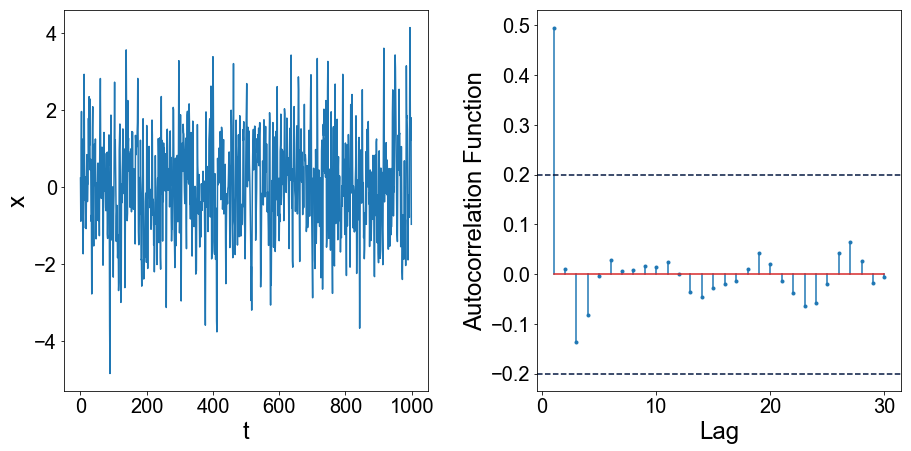

In [9]:
params = {'legend.fontsize': 'x-large',
              'figure.figsize': (15,7),
              'font.family': 'Arial',
              'font.size': 20,
              'axes.labelsize': 24,
              'axes.titlesize': 24,
              'xtick.labelsize': 20,
              'ytick.labelsize': 20,
              'legend.fontsize': 14,
              'legend.loc': 'upper left'}

plt.rcParams.update(params)

plt.subplot(1,2,1)
plt.plot(list(range(0,t_end)), x)
plt.ylabel('x')
plt.xlabel('t')

plt.subplot(1,2,2)
plt.stem(lag_list, corr_func, markerfmt='.')
plt.ylabel('Autocorrelation Function')
plt.axhline(y=0.2, color='xkcd:navy', linestyle='--')
plt.axhline(y=-0.2, color='xkcd:navy', linestyle='--')
plt.xlabel('Lag')

plt.subplots_adjust(wspace = 0.3)

In [10]:
model = AR(x)
model_fit = model.fit(method='mle', ic='aic', trend='nc')
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

print("95% confidence intervals:")
print(model_fit.conf_int(0.05))

Lag: 2
Coefficients: [ 0.65223443 -0.31366032]
95% confidence intervals:
[[ 0.59330948  0.71115939]
 [-0.3726177  -0.25470294]]


We see that the fitted model has correctly calculated the autoregression order to be 2 and has calculated the coefficients to be 0.65223 and -0.3136 both of which are within the 95% intervals shown above.

## AR model for financial data

Here, we will construct an AR model of a financial time series, that of Amazon stock


In [11]:
price_data = wb.DataReader("AMZN", data_source='yahoo', start='2007-01-01', end='2015-01-01')[['Close','Adj Close']]

price_data.head()

,Close,Adj Close
Date,,
2007-01-03,38.700001,38.700001
2007-01-04,38.900002,38.900002
2007-01-05,38.369999,38.369999
2007-01-08,37.500000,37.500000
2007-01-09,37.779999,37.779999


Text(0,0.5,'AMZN Price')

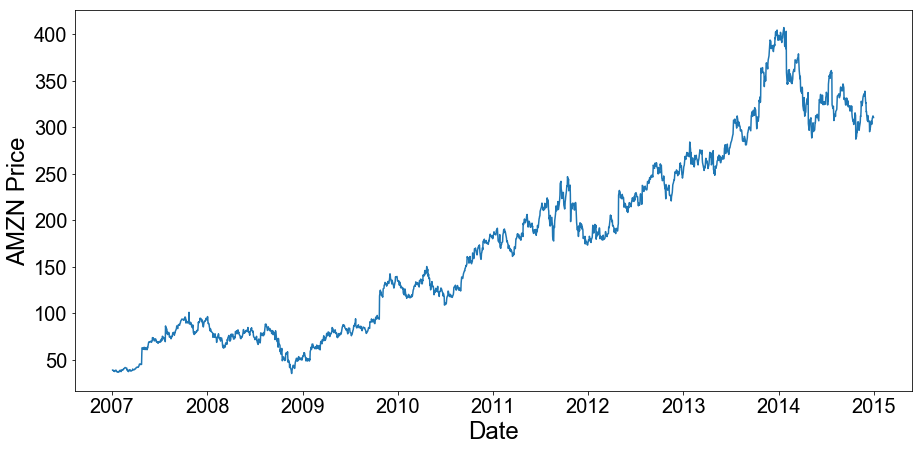

In [12]:
params = {'legend.fontsize': 'x-large',
              'figure.figsize': (15,7),
              'font.family': 'Arial',
              'font.size': 20,
              'axes.labelsize': 24,
              'axes.titlesize': 24,
              'xtick.labelsize': 20,
              'ytick.labelsize': 20,
              'legend.fontsize': 14,
              'legend.loc': 'upper left'}

plt.rcParams.update(params)

plt.plot(price_data['Close'])
plt.xlabel('Date')
plt.ylabel('AMZN Price')

Next we will construct the return time series and plot it and the associated correllogram. For this exercise, we will only fit the daily closing prices

In [13]:
return_data = np.log(price_data['Close']).diff()
return_data = return_data.dropna(axis=0)
return_data.head()

Date
2007-01-04    0.005155
2007-01-05   -0.013718
2007-01-08   -0.022935
2007-01-09    0.007439
2007-01-10   -0.016816
Name: Close, dtype: float64

In [15]:
lag_list = list(range(1,36))
corr_func = autocorr(return_data, lag_list) 

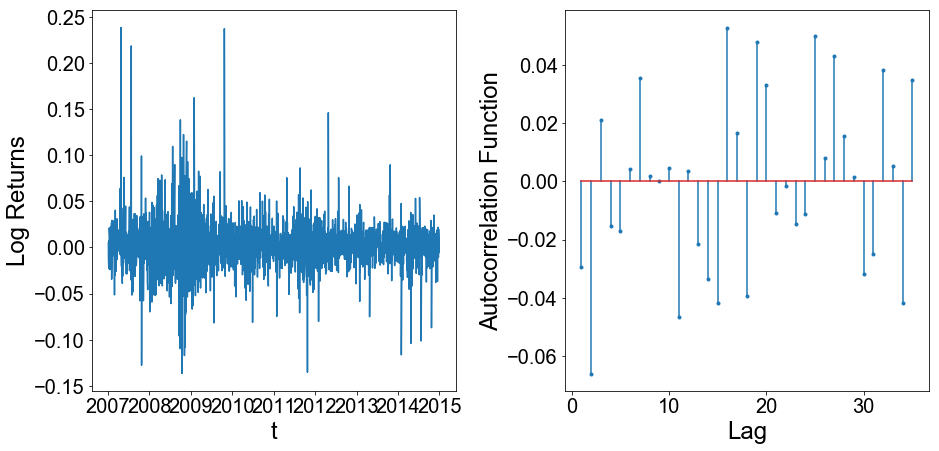

In [16]:
params = {'legend.fontsize': 'x-large',
              'figure.figsize': (15,7),
              'font.family': 'Arial',
              'font.size': 20,
              'axes.labelsize': 24,
              'axes.titlesize': 24,
              'xtick.labelsize': 20,
              'ytick.labelsize': 20,
              'legend.fontsize': 14,
              'legend.loc': 'upper left'}

plt.rcParams.update(params)

plt.subplot(1,2,1)
plt.plot(return_data)
plt.ylabel('Log Returns')
plt.xlabel('t')

plt.subplot(1,2,2)
plt.stem(lag_list, corr_func, markerfmt='.')
plt.ylabel('Autocorrelation Function')
plt.xlabel('Lag')

plt.subplots_adjust(wspace = 0.3)

In [17]:
model = AR(np.array(return_data))
model_fit = model.fit(method='mle', ic='aic', trend='nc')
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 20
Coefficients: [-0.02890315 -0.06339657  0.01479706 -0.01800888 -0.00653423  0.00804548
  0.03683146  0.0108901   0.00204552  0.0030931  -0.04414697  0.00116014
 -0.03221765 -0.03095983 -0.04299954  0.04594199  0.01789104 -0.02368844
  0.04744322  0.0355576 ]


It is indicative that there is likely a lot more complexity in the serial correlation than a simple linear model of past prices can really account for.

